In [42]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_pur=pd.read_csv(r'C:\Users\p_yenkar\Desktop\DataScience-Portfolio\MachineLearning_Projects\Customer_Analytics\Data\purchase data.csv')

In [4]:
df_pur.head(2)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [6]:
df_pur.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [8]:
scaler=pickle.load(open('scaler.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))


In [10]:
features=df_pur[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_pur_segm_std=scaler.transform(features)

In [12]:
df_pur_segm_pca=pca.transform(df_pur_segm_std)

In [13]:
purchase_segm_kmeans_pca=kmeans_pca.predict(df_pur_segm_pca)

In [14]:
df_purchase_predictor=df_pur.copy()
df_purchase_predictor['Segment']=purchase_segm_kmeans_pca

In [15]:
df_purchase_predictor.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [20]:
temp1=df_purchase_predictor[['ID','Incidence']].groupby(['ID'],as_index=False).count()
temp1=temp1.set_index('ID')
temp1=temp1.rename(columns={'Incidence':'N_Visite'})
temp1.head()


,N_Visite
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [22]:
temp2=df_purchase_predictor[['ID','Incidence']].groupby(['ID'],as_index=False).sum()
temp2=temp2.set_index('ID')
temp2=temp2.rename(columns={'Incidence':'N_Purchases'})
temp3=temp1.join(temp2)
temp3.head()


,N_Visite,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [23]:
temp3['Avg N Purchases']=temp3['N_Purchases']/temp3['N_Visite']
temp3.head()

,N_Visite,N_Purchases,Avg N Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [24]:
temp4=df_purchase_predictor[['ID','Segment']].groupby(['ID'],as_index=False).mean()
temp4=temp4.set_index('ID')
df_purchase_descr=temp3.join(temp4)

In [25]:
df_purchase_descr

,N_Visite,N_Purchases,Avg N Purchases,Segment
ID,,,,
200000001,101,9,0.089109,0.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,0.0
200000004,85,11,0.129412,1.0
200000005,111,13,0.117117,0.0
...,...,...,...,...
200000496,120,20,0.166667,1.0
200000497,120,43,0.358333,1.0
200000498,131,39,0.297710,2.0


In [26]:
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0.0,0.290
1.0,0.362
2.0,0.152
3.0,0.196


Text(0.5, 1.0, 'Segment Proportions')

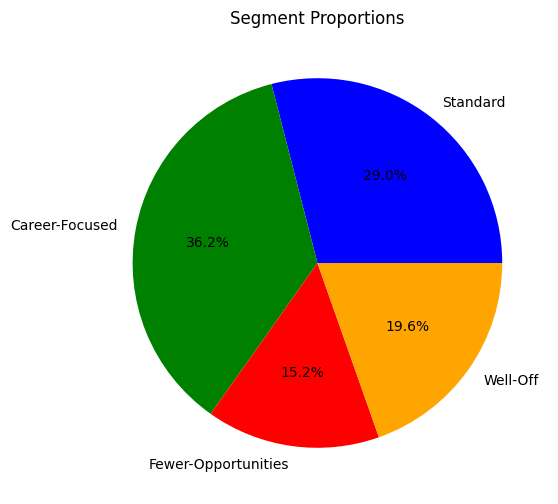

In [29]:
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')

In [30]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visite,N_Purchases,Avg N Purchases
Segment,,,
0.0,120.489655,34.965517,0.258081
1.0,114.303867,22.823204,0.201760
2.0,118.828947,27.171053,0.228956
3.0,117.367347,34.408163,0.282601


In [31]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

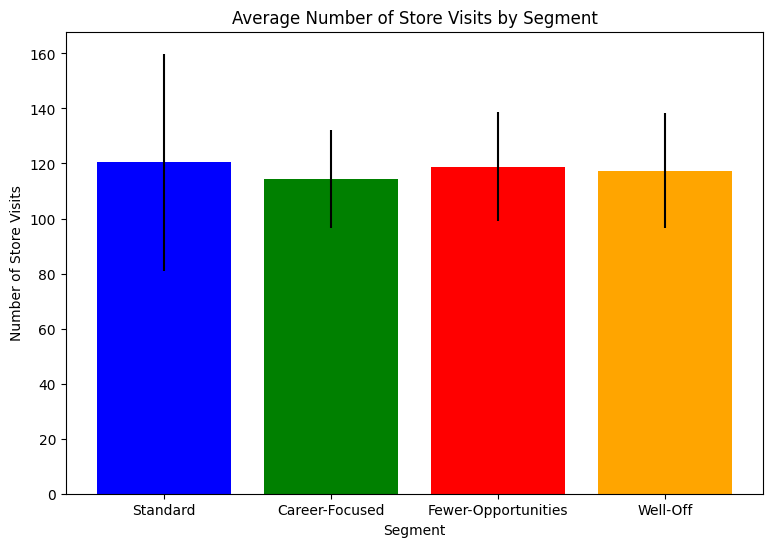

In [34]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['N_Visite'],
        yerr = segments_std['N_Visite'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Text(0.5, 1.0, 'Average Number of Purchases by Segment')

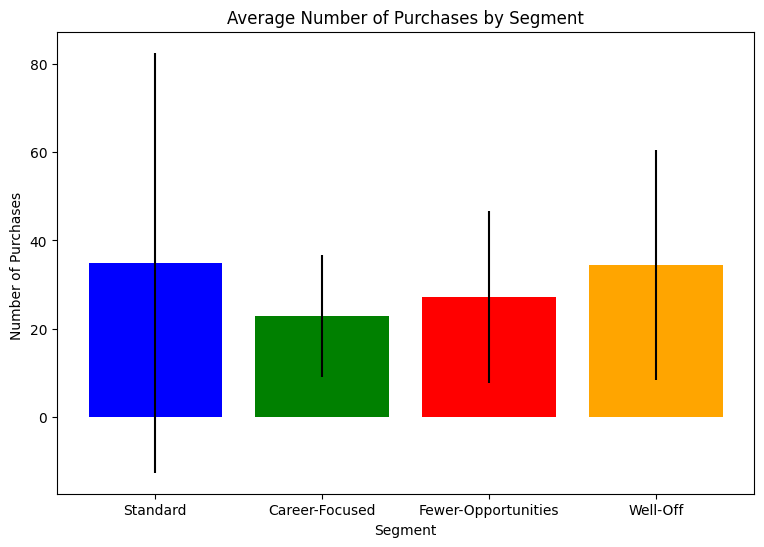

In [35]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Purchases ')
plt.title('Average Number of Purchases by Segment')

In [39]:
df_purchase_incidence = df_purchase_predictor[df_purchase_predictor['Incidence'] == 1]

In [40]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,False,True,False,False,False,0,200000001
11,False,False,False,False,True,0,200000001
19,True,False,False,False,False,0,200000001
24,False,False,False,True,False,0,200000001
29,False,True,False,False,False,0,200000001
...,...,...,...,...,...,...,...
58621,False,True,False,False,False,0,200000500
58648,True,False,False,False,False,0,200000500
58674,False,True,False,False,False,0,200000500
58687,False,True,False,False,False,0,200000500


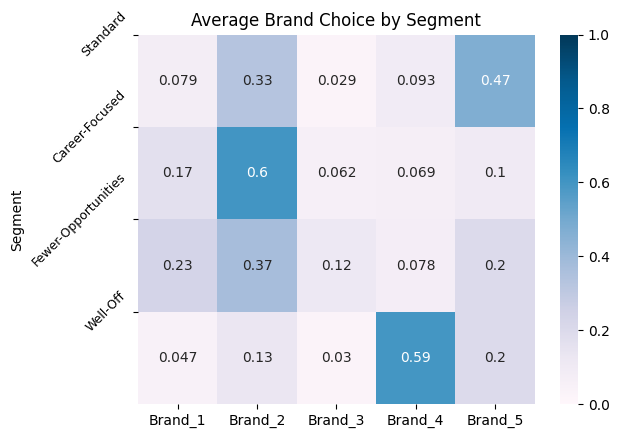

In [43]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()